# Stage 3 

## Soal 1

<span style= "color:pink">
Modeling
Lakukan modeling sesuai task yang ditentukan di awal dari hasil data yang telah dilakukan preprocessing dan cleaning pada tahapan sebelumnya: <br>

* Split Data Train & Test
* Modeling (Algoritma yang diimplementasikan tidak terbatas yang diajarkan di kelas)
* Model Evaluation: Pemilihan dan perhitungan metrics
* Model Evaluation: Apakah model sudah best-fit?
* Hyperparameter Tuning
<br>
Di laporan homework, tuliskan eksperimen apa saja yang telah dilakukan dan metode yang digunakan, dan mengapa memilih dan mengimplementasikan algoritma tersebut. Jelaskan masing-masing hasil dari eksperimen model yang telah dilakukan, alasan menggunakan metrics pada model tersebut, serta hyperparameter yang digunakan dan pengaruhnya terhadap model.</span>

In [118]:
# import lybrary
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.tree._export import plot_tree

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
# pip install catboost

In [7]:
df_new = pd.read_excel("Haolia_hasilcleaning.xlsx")

In [8]:
df_new.sample(10)

,Warehouse_block,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached_on_Time,Cost_of_the_Product_tf,Discount_offered_tf,Weight_in_gms_tf,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
6726,3,4,1,2,0,0,1,-0.306288,-0.098479,1.090919,1,0,0
6639,1,4,5,3,1,1,0,-0.250185,0.880781,0.593764,0,0,1
10465,4,5,1,6,0,0,0,-0.099634,0.479411,-1.602160,0,0,1
8509,4,3,2,4,1,1,0,1.778845,-0.283626,1.377105,1,0,0
1144,2,4,1,5,0,1,1,1.289272,-0.641962,-1.358168,0,0,1
4366,2,2,5,3,1,0,0,-0.229969,-0.707933,0.895237,0,1,0
7283,4,4,3,3,1,0,0,-0.556433,3.595831,0.779050,0,0,1
4731,1,6,3,6,1,0,0,-0.976554,-0.451062,0.395635,0,0,1
2066,0,3,1,3,2,0,1,1.378345,-0.036917,-1.446225,1,0,0
7089,1,3,3,3,1,0,0,0.227562,0.862966,1.403399,0,0,1


> Split Data Train & Test

In [9]:
X = df_new.drop(columns=['Reached_on_Time'])
y = df_new['Reached_on_Time']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> Model 1 LogisticRegression

In [11]:
# Model 1 LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [12]:
LRP = { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': np.logspace(-4,4,20)
    }

In [13]:
# hyper parameter untuk model 1 logitsicRegression 
LR = LogisticRegression()
GSCV = GridSearchCV(LR, LRP, cv = 5, n_jobs = -1, verbose = 0, scoring = 'accuracy')
GSCV.fit(X_train, y_train)
y_pred = GSCV.predict(X_test)
print(f'accuracy_score = {accuracy_score(y_test, y_pred)}')
print(f'Recall Score = {recall_score(y_test, y_pred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')

accuracy_score = 0.6327272727272727
Recall Score = 0.7793103448275862
ROC_AUC Score = 0.5991523791177037


In [14]:
y_pred_train = GSCV.predict(X_train)
print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
print(f'accuracy_score = {accuracy_score(y_train, y_pred_train)}')
print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')

Recall Score = 0.7805249144161278
accuracy_score = 0.6305261961586544
ROC_AUC Score = 0.5941596613876742


In [15]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

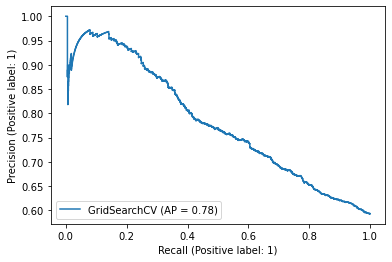

In [16]:
plot_precision_recall_curve(GSCV,X_test,y_test)

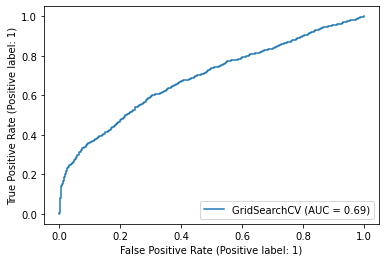

In [17]:
plot_roc_curve(GSCV,X_test,y_test)

> Model 2 DecisionTreeClassifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model = DecisionTreeClassifier()

In [20]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred_train = model.predict(X_train)
print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
print(f'accuracy_score = {accuracy_score(y_train, y_pred_train)}')
print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')

Recall Score = 1.0
accuracy_score = 1.0
ROC_AUC Score = 1.0


In [22]:
y_pred = model.predict(X_test)
print(f'accuracy_score = {accuracy_score(y_test, y_pred)}')
print(f'Recall Score = {recall_score(y_test, y_pred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')

accuracy_score = 0.6418181818181818
Recall Score = 0.714176245210728
ROC_AUC Score = 0.6252445471863696


In [23]:
base_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [25]:
confusion_matrix(y_test,base_pred)

array([[480, 415],
       [373, 932]], dtype=int64)

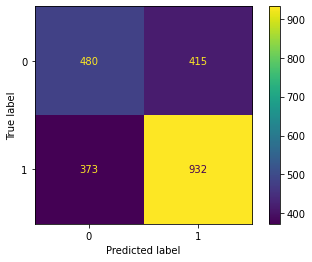

In [26]:
plot_confusion_matrix(model,X_test,y_test)

In [27]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55       895
           1       0.69      0.71      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



In [34]:
def report_model(model): #function reports back classification results and plots out the tree.
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

In [35]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [110]:
pip install --upgrade sklearn

Note: you may need to restart the kernel to use updated packages.


              precision    recall  f1-score   support

           0       0.58      0.77      0.66       895
           1       0.80      0.62      0.70      1305

    accuracy                           0.68      2200
   macro avg       0.69      0.70      0.68      2200
weighted avg       0.71      0.68      0.68      2200





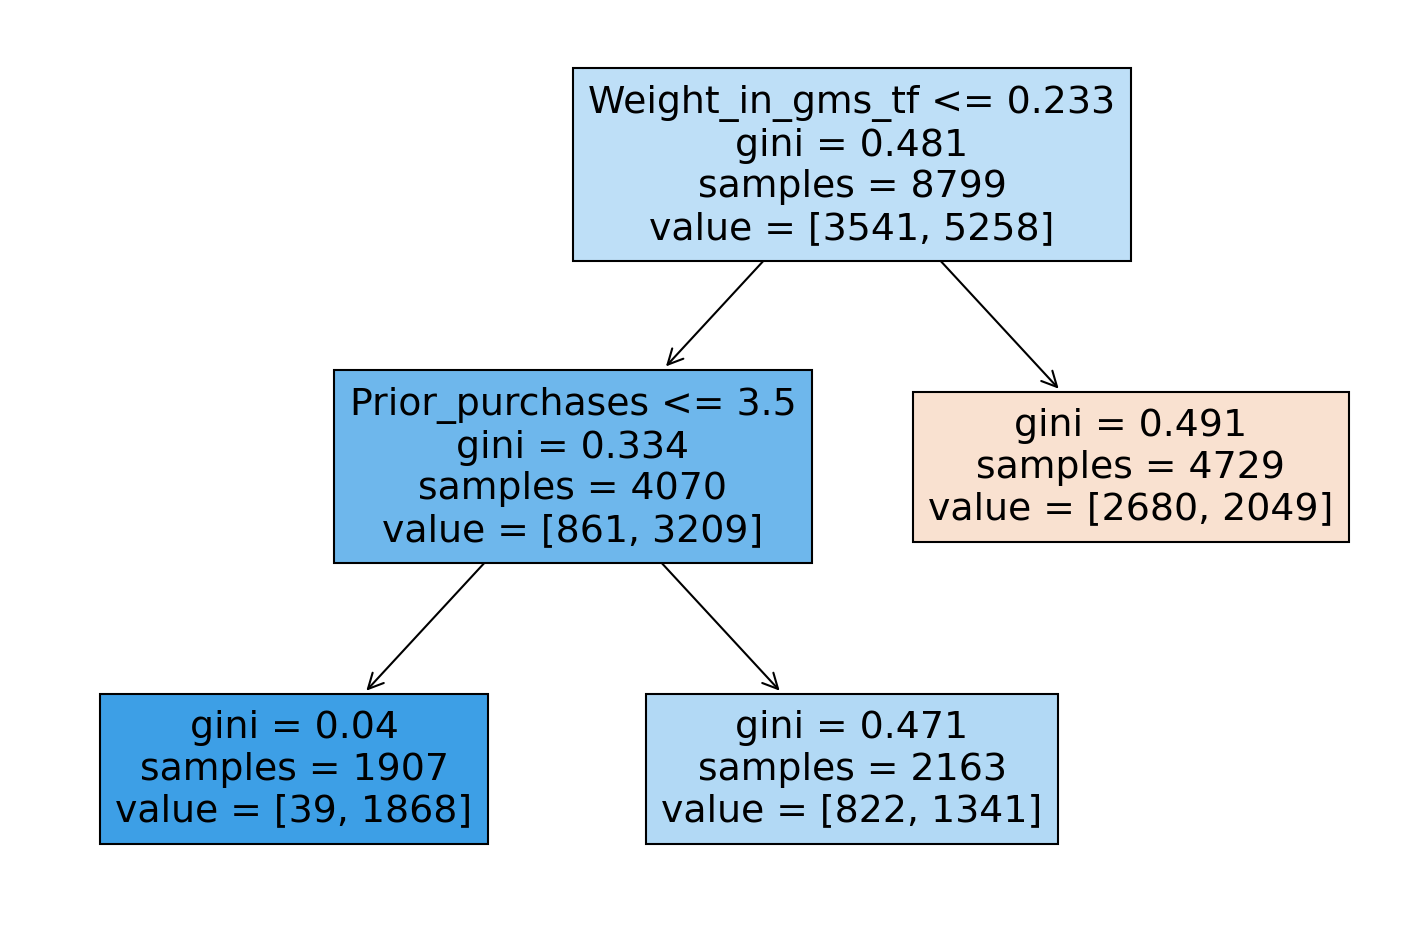

In [115]:
report_model(pruned_tree)

In [37]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.58      0.77      0.66       895
           1       0.80      0.62      0.70      1305

    accuracy                           0.68      2200
   macro avg       0.69      0.70      0.68      2200
weighted avg       0.71      0.68      0.68      2200





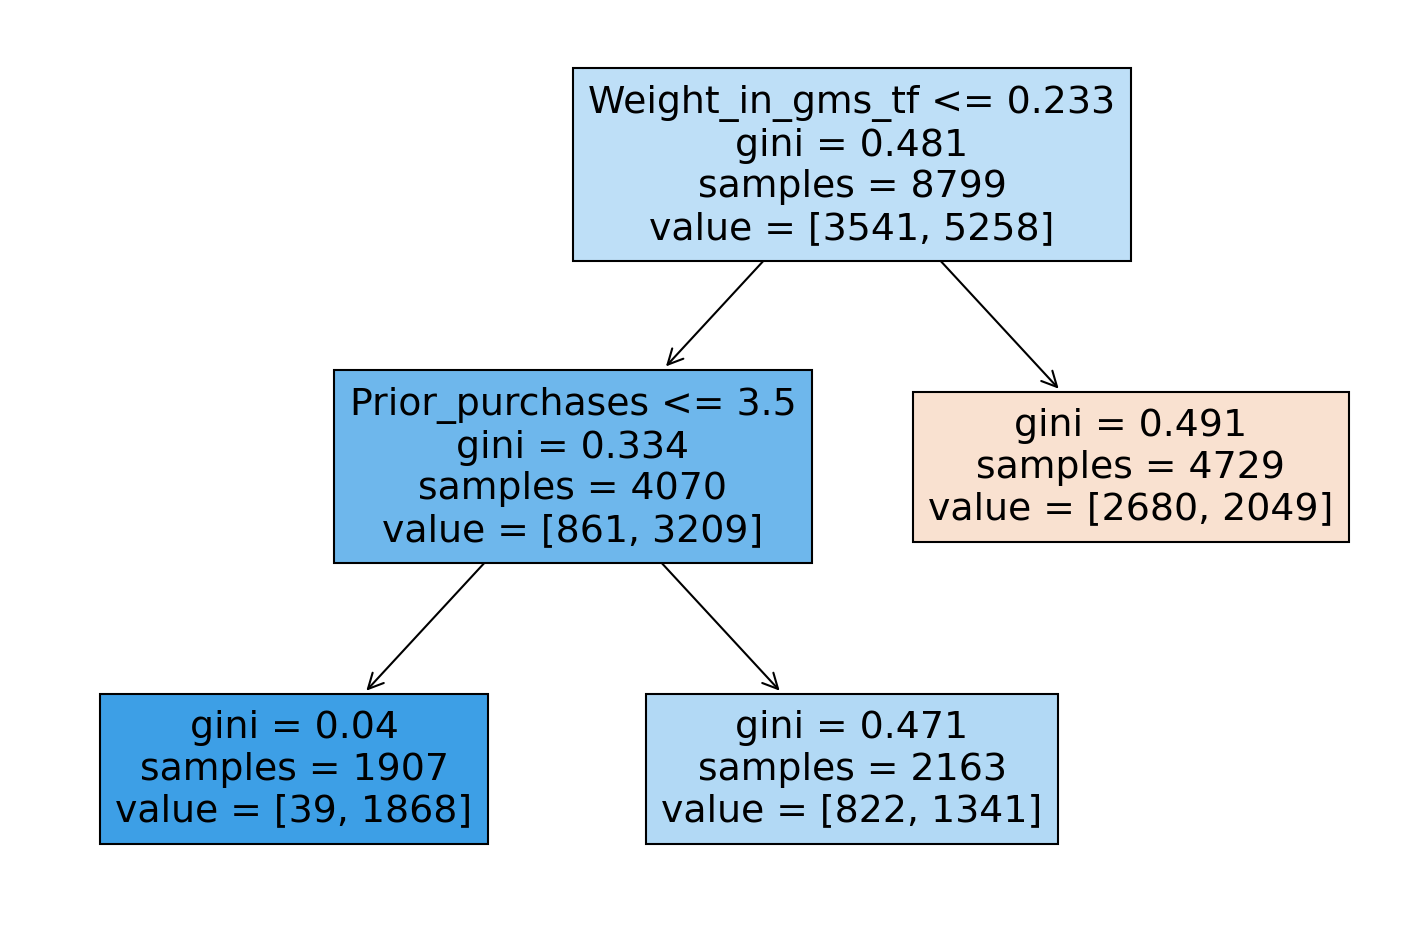

In [116]:
report_model(pruned_tree)

In [40]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.57      0.53      0.55       895
           1       0.69      0.73      0.71      1305

    accuracy                           0.65      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.65      0.65      2200





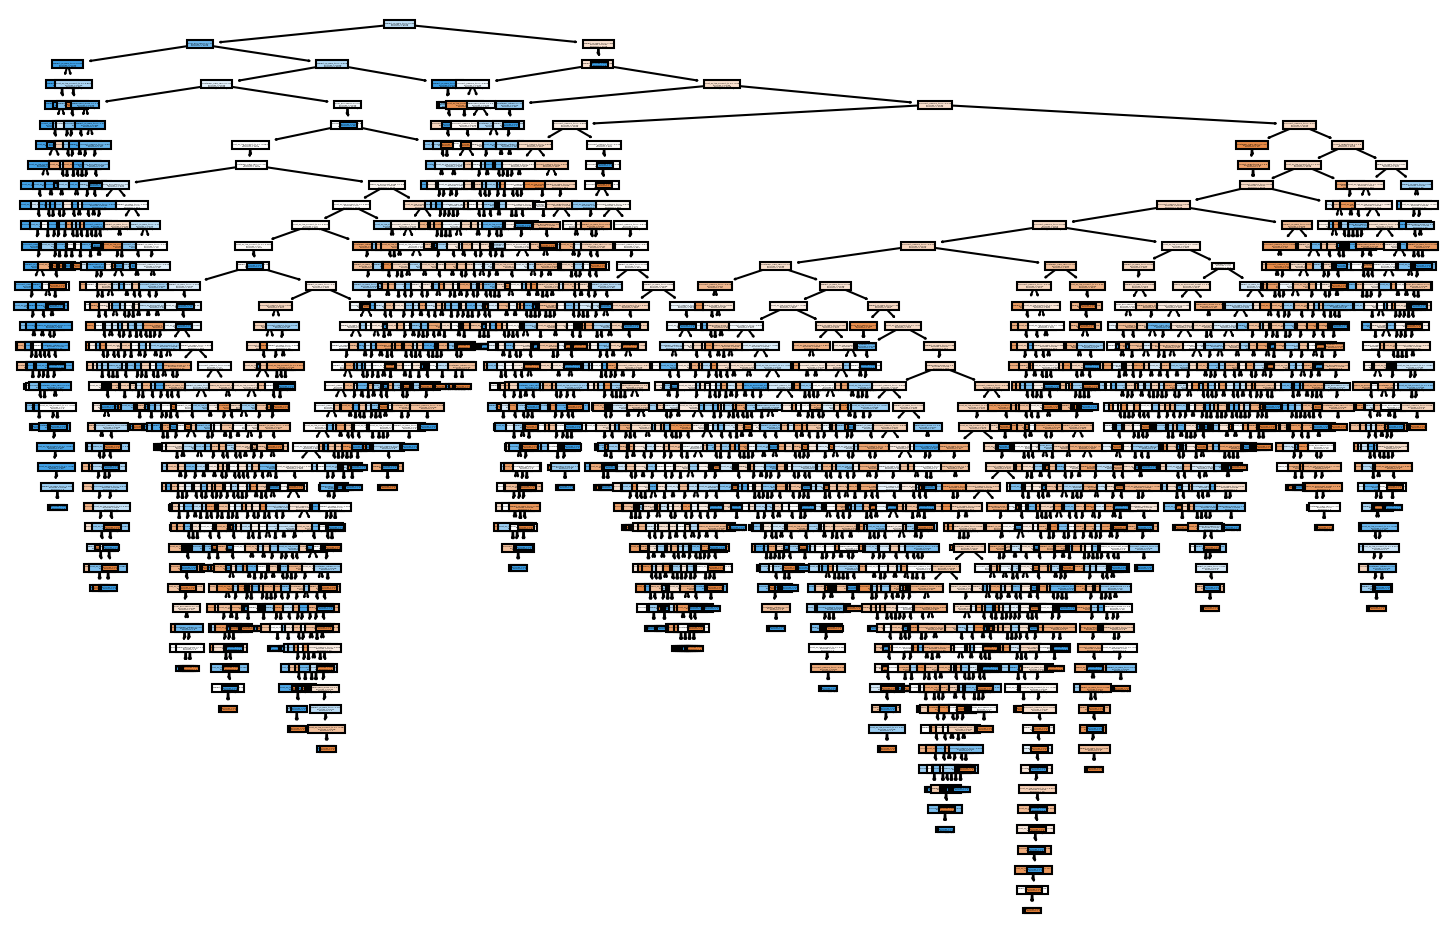

In [117]:
report_model(entropy_tree)

> RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6595454545454545


In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [46]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score} 

In [47]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

Jika dilihat dari model baseline, model tersebut adalah model yang undertrain. karena itu kita perlu menaikkan variasi dari model dengan menggunakan model-model boosting

> Another Model 

In [48]:
models = [DecisionTreeClassifier(),
          KNeighborsClassifier(),
          SVC(),
         RandomForestClassifier(random_state = 42),
         GradientBoostingClassifier(),
         XGBClassifier(random_state = 42, use_label_encoder=False, scale_pos_weight = 5),
         AdaBoostClassifier(random_state = 42),
         CatBoostClassifier(random_state = 42, verbose = False)]
names = ['Decision Tree',
         'KNN',
         'SVM',
       'Random Forest',
       'Gradient Boosting',
       'XGBoost',
       'AdaBoost',
       'CatBoost']

In [49]:
def model_score(model, name):
    print(f'{name}:')
    model = model
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
    print(f'accuracy_score = {accuracy_score(y_train, y_pred_train)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
    
    print('Test score:')
    y_pred = model.predict(X_test)
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'accuracy_score = {accuracy_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    
    print('\n')

In [50]:
for i in range(len(models)):
    model_score(models[i], names[i])

Decision Tree:
Recall Score = 1.0
accuracy_score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.7103448275862069
accuracy_score = 0.6459090909090909
ROC_AUC Score = 0.6311500674243883


KNN:
Recall Score = 0.802015975656143
accuracy_score = 0.7665643823161723
ROC_AUC Score = 0.7579692981923754
Test score:
Recall Score = 0.6812260536398468
accuracy_score = 0.6263636363636363
ROC_AUC Score = 0.6137973843618227


SVM:
Recall Score = 0.7616964625332826
accuracy_score = 0.6565518808955563
ROC_AUC Score = 0.6310600358416201
Test score:
Recall Score = 0.753256704980843
accuracy_score = 0.6468181818181818
ROC_AUC Score = 0.6224384083563432


Random Forest:
Recall Score = 1.0
accuracy_score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.6544061302681993
accuracy_score = 0.6527272727272727
ROC_AUC Score = 0.6523427299385689


Gradient Boosting:
Recall Score = 0.6350323316850514
accuracy_score = 0.7148539606773497
ROC_AUC Score = 0.7342063663508567
Test score:
Recall Score = 0.613

## After Hyperparameter Tuning

In [51]:
def plusNone(arr):
    return np.array(arr.tolist() + [None])

In [52]:
params = [
    { # Decision Tree
        'max_depth': plusNone(np.linspace(1, 32, 32, endpoint=True)),
        'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features': plusNone(np.array(range(1,X_train.shape[1])))
    },
    { # KNearestNeighbor
        'leaf_size': list(range(1,50)),
        'n_neighbors': list(range(1,30)),
        'p': [1,2],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    {# SVC
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    }, 
    {#Random Forest
        'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    },
    {# Gradient Boosting
        "n_estimators":[5,50,250,500],
        "max_depth":[1,3,5,7,9],
        "learning_rate":[0.01,0.1,1,10,100]
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
    },
    { # Adaboost
       'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
       'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],
       'algorithm': ['SAMME', 'SAMME.R']
    },
    {# Catboost
        'max_depth': [3,4,5],
        'n_estimators':[100, 200, 300]
    }
]

In [53]:
def model_score_tune_rscv(model, name, params, n_iter = 10, verbose = 0):
    print(f'{name}:')
    RSCV = RandomizedSearchCV(model, params, cv = 2, n_jobs = -1, verbose = verbose, scoring = ['recall', 'roc_auc'], random_state = 42, refit = 'recall', n_iter = n_iter)
    RSCV.fit(X_train, y_train)
    y_pred_train = RSCV.predict(X_train)
    print('Train score:')
    print(f'accuracy_score = {accuracy_score(y_train, y_pred_train)}')
    print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
    y_pred = RSCV.predict(X_test)
    print('Test score:')
    print(f'accuracy_score = {accuracy_score(y_test, y_pred)}')
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print(RSCV.best_params_)
    print('\n')

In [54]:
def model_score_tune_gscv(model, name, params, verbose = 0):
    print(f'{name}:')
    GSCV = GridSearchCV(model, params, cv = 2, n_jobs = -1, verbose = verbose, scoring = 'recall')
    GSCV.fit(X_train, y_train)
    y_pred_train = GSCV.predict(X_train)
    print('Train score:')
    print(f'accuracy_score = {accuracy_score(y_train, y_pred_train)}')
    print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
    y_pred = GSCV.predict(X_test)
    print('Test score:')
    print(f'accuracy_score = {accuracy_score(y_test, y_pred)}')
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print(GSCV.best_params_)
    print('\n')

In [55]:
def rand_state(model, name, params = {'random_state' : (range(0,1000))}):
    print(f'{name}:')
    GSCV = GridSearchCV(model, params, cv = 2, n_jobs = -1, verbose = 0, scoring = 'recall')
    GSCV.fit(X_train, y_train)
    y_pred_train = GSCV.predict(X_train)
    print('Train score:')
    print(f'accuracy_score = {accuracy_score(y_train, y_pred_train)}')
    print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')
    y_pred = GSCV.predict(X_test)
    print('Test score:')
    print(f'accuracy_score = {accuracy_score(y_test, y_pred)}')
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print(GSCV.best_params_)
    print('\n')

In [56]:
def rand_state(model, par, n = range(0,1000)):
    # accuracy = []
    recalls = []
    ROC_AUCs = []
    for i in n:
#         model = DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = i)
        model = model
        for k, v in par.items():
            setattr(model, k, v)
        setattr(model, 'random_state', i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        recalls.append(recall_score(y_test, y_pred))
        ROC_AUCs.append(roc_auc_score(y_test, y_pred))
    recArr = np.array(recalls)
    rocArr = np.array(ROC_AUCs)
    print(f'max recall = {recArr.max()}, rs = {recArr.argmax()}')
    print(f'max ROC_AUC = {rocArr.max()}, rs = {rocArr.argmax()}')

In [57]:
rand_state(DecisionTreeClassifier(), {'max_depth': 16.0, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 2})

max recall = 0.7241379310344828, rs = 892
max ROC_AUC = 0.6974485755260172, rs = 726


In [58]:
rand_state(RandomForestClassifier(), {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200})

max recall = 0.6812260536398468, rs = 229
max ROC_AUC = 0.6733812795650592, rs = 604


In [59]:
for i in range(0,1):
    model_score_tune_gscv(models[i], names[i], params[i])

Decision Tree:
Train score:
accuracy_score = 0.5975679054438005
Recall Score = 1.0
ROC_AUC Score = 0.5
Test score:
accuracy_score = 0.5931818181818181
Recall Score = 1.0
ROC_AUC Score = 0.5
{'max_depth': 1.0, 'max_features': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}




In [60]:
model = DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469)
model_score(model, 'Decision Tree')

Decision Tree:
Recall Score = 0.8160897679726131
accuracy_score = 0.829412433231049
ROC_AUC Score = 0.8326424552938467
Test score:
Recall Score = 0.6720306513409962
accuracy_score = 0.6454545454545455
ROC_AUC Score = 0.6393672809777606




In [61]:
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469), random_state = 42)
model_score(model, 'AdaBoost')

AdaBoost:
Recall Score = 1.0
accuracy_score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.7172413793103448
accuracy_score = 0.6427272727272727
ROC_AUC Score = 0.6256597958004239




In [62]:
for i in range(0,3):
    model_score_tune_gscv(models[i], names[i], params[i])

Decision Tree:
Train score:
accuracy_score = 0.5975679054438005
Recall Score = 1.0
ROC_AUC Score = 0.5
Test score:
accuracy_score = 0.5931818181818181
Recall Score = 1.0
ROC_AUC Score = 0.5
{'max_depth': 1.0, 'max_features': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}


KNN:
Train score:
accuracy_score = 0.6961018297533811
Recall Score = 0.7681627995435527
ROC_AUC Score = 0.6786309620423214
Test score:
accuracy_score = 0.6354545454545455
Recall Score = 0.7103448275862069
ROC_AUC Score = 0.6183009054132151
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 25, 'p': 1}


SVM:
Train score:
accuracy_score = 0.5975679054438005
Recall Score = 1.0
ROC_AUC Score = 0.5
Test score:
accuracy_score = 0.5931818181818181
Recall Score = 1.0
ROC_AUC Score = 0.5
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}




In [63]:
model_score_tune_gscv(models[3], names[3], params[3])

Random Forest:
Train score:
accuracy_score = 1.0
Recall Score = 1.0
ROC_AUC Score = 1.0
Test score:
accuracy_score = 0.6554545454545454
Recall Score = 0.675095785440613
ROC_AUC Score = 0.6509557139493569
{'bootstrap': False, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}




In [64]:
model_score(RandomForestClassifier(**{'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 26}), 'Random Forest')

Random Forest:
Recall Score = 1.0
accuracy_score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.6689655172413793
accuracy_score = 0.6613636363636364
ROC_AUC Score = 0.6596224234251589




In [65]:
model_score_tune_gscv(models[4], names[4], params[4])

Gradient Boosting:
Train score:
accuracy_score = 0.5975679054438005
Recall Score = 1.0
ROC_AUC Score = 0.5
Test score:
accuracy_score = 0.5931818181818181
Recall Score = 1.0
ROC_AUC Score = 0.5
{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}




In [66]:
model_score_tune_rscv(models[5], names[5], params[5], 1000, verbose = 1)

XGBoost:
Fitting 2 folds for each of 1000 candidates, totalling 2000 fits
Train score:
accuracy_score = 0.5977952040004546
Recall Score = 1.0
ROC_AUC Score = 0.5002824060999718
Test score:
accuracy_score = 0.5927272727272728
Recall Score = 0.9984674329501916
ROC_AUC Score = 0.4997923756929729
{'tree_method': 'approx', 'min_child_weight': 20, 'max_depth': 10, 'lambda': 0.0, 'gamma': 1.0, 'eta': 0.6262626262626263, 'colsample_bytree': 0.1, 'alpha': 0.9}




In [67]:
par = {'tree_method': 'auto', 'min_child_weight': 1, 'lambda': 0.1, 'gamma': 0, 'eta': 0.9, 'colsample_bytree': 1.0, 'alpha': 0.25, 'random_state' : 42, 'use_label_encoder':False, 'scale_pos_weight': 5}
model = XGBClassifier(**par)
model_score(model, 'XGBoost')

XGBoost:
Recall Score = 1.0
accuracy_score = 0.9678372542334356
ROC_AUC Score = 0.9600395368539961
Test score:
Recall Score = 0.7716475095785441
accuracy_score = 0.6204545454545455
ROC_AUC Score = 0.5858237547892721




In [68]:
par = {'max_depth': 6, 'tree_method': 'auto', 'min_child_weight': 2, 'lambda': 1, 'gamma': 0, 'eta': 0.9, 'colsample_bytree': 0.8, 'alpha': 0.25, 'use_label_encoder':False, 'scale_pos_weight': 5,  'eval_metric': 'logloss'}
recalls = []
ROC_AUCs = []
for i in range(1000):
    model = XGBClassifier(**par)
    setattr(model, 'random_state', i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recalls.append(recall_score(y_test, y_pred))
    ROC_AUCs.append(roc_auc_score(y_test, y_pred))
recArr = np.array(recalls)
rocArr = np.array(ROC_AUCs)
print(f'max recall = {recArr.max()}, rs = {recArr.argmax()}')
print(f'max ROC_AUC = {rocArr.max()}, rs = {rocArr.argmax()}')

max recall = 0.8352490421455939, rs = 820
max ROC_AUC = 0.6150688156852673, rs = 152


In [69]:
par = {'max_depth': 6, 'tree_method': 'auto', 'min_child_weight': 2, 'lambda': 1, 'gamma': 0, 'eta': 0.9, 'colsample_bytree': 0.8, 'alpha': 0.25, 'random_state' : 322, 'use_label_encoder':False, 'scale_pos_weight': 5, 'eval_metric': 'logloss'}
model = XGBClassifier(**par)
model_score(model, 'XGBoost')

XGBoost:
Recall Score = 1.0
accuracy_score = 0.9314694851687692
ROC_AUC Score = 0.9148545608585146
Test score:
Recall Score = 0.8007662835249042
accuracy_score = 0.6263636363636363
ROC_AUC Score = 0.5864166613155247




In [70]:
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469), random_state = 42)
model_score(model, 'AdaBoost')

AdaBoost:
Recall Score = 1.0
accuracy_score = 1.0
ROC_AUC Score = 1.0
Test score:
Recall Score = 0.7172413793103448
accuracy_score = 0.6427272727272727
ROC_AUC Score = 0.6256597958004239




In [71]:
par = {
    'base_estimator' : DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469),
    'learning_rate' : 0.01,
    'n_estimators' : 20,
    'algorithm' : 'SAMME'
}

In [72]:
rand_state(AdaBoostClassifier(), par)

max recall = 0.6590038314176245, rs = 29
max ROC_AUC = 0.699220873734455, rs = 966


In [73]:
par = {
    'base_estimator' : DecisionTreeClassifier(max_depth = 16.0, max_features = 9, min_samples_leaf= 1, min_samples_split=2, random_state = 469),
    'learning_rate' : 0.01,
    'n_estimators' : 20,
    'algorithm' : 'SAMME',
    'random_state' : 433
}

In [74]:
model_score(AdaBoostClassifier(**par), 'AdaBoost')

AdaBoost:
Recall Score = 0.8642069227843286
accuracy_score = 0.9123764064098193
ROC_AUC Score = 0.9240548875429693
Test score:
Recall Score = 0.6283524904214559
accuracy_score = 0.6681818181818182
ROC_AUC Score = 0.6773047368308397




In [75]:
for i in range(7,len(models)):
    model_score_tune_gscv(models[i], names[i], params[i])

CatBoost:
Train score:
accuracy_score = 0.781225139220366
Recall Score = 0.7272727272727273
ROC_AUC Score = 0.7943056660932968
Test score:
accuracy_score = 0.6636363636363637
Recall Score = 0.6291187739463602
ROC_AUC Score = 0.6715426271966438
{'max_depth': 5, 'n_estimators': 200}




# Runningnya sampai sini Dulu lalu lanjutkan ke feature importance 


> Before Hyperparameter Tuning

In [76]:
def model_score(model, name):
    print(f'{name}:')
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('\n')

In [77]:
for i in range(len(models)):
    model_score(models[i], names[i])

Decision Tree:
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       895
           1       0.69      0.71      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.64      0.64      2200



KNN:
              precision    recall  f1-score   support

           0       0.54      0.55      0.54       895
           1       0.69      0.68      0.68      1305

    accuracy                           0.63      2200
   macro avg       0.61      0.61      0.61      2200
weighted avg       0.63      0.63      0.63      2200



SVM:
              precision    recall  f1-score   support

           0       0.58      0.49      0.53       895
           1       0.68      0.75      0.72      1305

    accuracy                           0.65      2200
   macro avg       0.63      0.62      0.62      2200
weighted avg       0.64      0.65      0.64  

> After Hyperparameter Tuning

In [78]:
def model_score_tune_rscv(model, name, params, n_iter = 10):
    print(f'{name}:')
    RSCV = RandomizedSearchCV(model, params, cv = 3, n_jobs = -1, verbose = 0, scoring = ['recall', 'roc_auc'], random_state = 42, refit = 'recall', n_iter = n_iter)
    RSCV.fit(X_train, y_train)
    y_pred = RSCV.predict(X_test)
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print(RSCV.best_params_)
    print('\n')

In [79]:
def model_score_tune_gscv(model, name, params):
    print(f'{name}:')
    GSCV = GridSearchCV(model, params, cv = 3, n_jobs = -1, verbose = 0, scoring = 'recall')
    GSCV.fit(X_train, y_train)
    y_pred = GSCV.predict(X_test)
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print(GSCV.best_params_)
    print('\n')

In [80]:
for i in range(0,3):
    model_score_tune_gscv(models[i], names[i], params[i])

Decision Tree:
Recall Score = 1.0
ROC_AUC Score = 0.5
{'max_depth': 1.0, 'max_features': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}


KNN:
Recall Score = 0.7226053639846743
ROC_AUC Score = 0.613257989254907
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 29, 'p': 1}


SVM:
Recall Score = 1.0
ROC_AUC Score = 0.5
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}




In [81]:
model_score_tune_rscv(models[3], names[3], params[3], 100)

Random Forest:
Recall Score = 0.6743295019157088
ROC_AUC Score = 0.6639803934159549
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}




In [82]:
model_score_tune_gscv(models[4], names[4], params[4])

Gradient Boosting:
Recall Score = 1.0
ROC_AUC Score = 0.5
{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}




In [83]:
for i in range(len(models)):
    model_score_tune_rscv(models[i], names[i], params[i], 100)

Decision Tree:
Recall Score = 1.0
ROC_AUC Score = 0.5
{'min_samples_split': 0.7000000000000001, 'min_samples_leaf': 0.30000000000000004, 'max_features': 5, 'max_depth': 8.0}


KNN:
Recall Score = 0.7226053639846743
ROC_AUC Score = 0.613257989254907
{'p': 1, 'n_neighbors': 29, 'leaf_size': 42, 'algorithm': 'ball_tree'}


SVM:
Recall Score = 1.0
ROC_AUC Score = 0.5
{'kernel': 'rbf', 'gamma': 1, 'C': 0.1}


Random Forest:
Recall Score = 0.6743295019157088
ROC_AUC Score = 0.6639803934159549
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


Gradient Boosting:
Recall Score = 1.0
ROC_AUC Score = 0.5
{'n_estimators': 5, 'max_depth': 1, 'learning_rate': 0.01}


XGBoost:
Recall Score = 1.0
ROC_AUC Score = 0.5011173184357542
{'tree_method': 'hist', 'min_child_weight': 16, 'max_depth': 20, 'lambda': 0.5, 'gamma': 0.7000000000000001, 'eta': 0.494949494949495, 'colsample_bytree': 0.1, 'alpha': 0.7000000000000001}


A

In [84]:
for i in range(5,len(models)):
    model_score_tune_rscv(models[i], names[i], params[i], 100)

XGBoost:
Recall Score = 1.0
ROC_AUC Score = 0.5011173184357542
{'tree_method': 'hist', 'min_child_weight': 16, 'max_depth': 20, 'lambda': 0.5, 'gamma': 0.7000000000000001, 'eta': 0.494949494949495, 'colsample_bytree': 0.1, 'alpha': 0.7000000000000001}


AdaBoost:
Recall Score = 0.8390804597701149
ROC_AUC Score = 0.5826687215051691
{'n_estimators': 200, 'learning_rate': 0.021842105263157895, 'algorithm': 'SAMME.R'}


CatBoost:
Recall Score = 0.6237547892720307
ROC_AUC Score = 0.6822684560885294
{'n_estimators': 300, 'max_depth': 5}




In [85]:
from sklearn import metrics
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [86]:
model_score_tune_gscv(models[0], names[0], params[0])

Decision Tree:
Recall Score = 1.0
ROC_AUC Score = 0.5
{'max_depth': 1.0, 'max_features': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}




In [87]:
model = DecisionTreeClassifier(random_state = 7)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(f'Recall Score = {recall_score(y_test, ypred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, ypred)}')

Recall Score = 0.7049808429118773
ROC_AUC Score = 0.6234401421263297


In [88]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(f'Recall Score = {recall_score(y_test, ypred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, ypred)}')

Recall Score = 0.6544061302681993
ROC_AUC Score = 0.6523427299385689


In [93]:
print(f'Random Forest:')
RSCV = RandomizedSearchCV(RandomForestClassifier(random_state = 42), params[3], cv = 3, n_jobs = -1, verbose = 0, scoring = ['recall', 'roc_auc'], random_state = 42, refit = 'recall', n_iter = 10)
RSCV.fit(X_train, y_train)
y_pred = RSCV.predict(X_test)
print(f'Recall Score = {recall_score(y_test, y_pred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')

Random Forest:
Recall Score = 0.6674329501915709
ROC_AUC Score = 0.6582974806823777


In [94]:
RSCV.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': False}

In [95]:
model = RandomForestClassifier(bootstrap = False, max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200, random_state = 42)
model.fit(X_train, y_train )
ypred = model.predict(X_test)
print(f'Recall Score = {recall_score(y_test, ypred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, ypred)}')

Recall Score = 0.6743295019157088
ROC_AUC Score = 0.6639803934159549


> Model disini belum best-fit karena masih dapat ditemukan model yang lebih baik lagi dengan mencoba menggunakan feature-feature lain pada data yang terkena drop pada tahap preprocess, serta dapat mentuning hyperparameter dengan lebih baik lagi

## Soal 2 

<span style= "color:pink">
Setelah mendapatkan model yang paling baik, lakukan interpretasi pada model dengan melihat feature importance-nya. Apa yang menyebabkan hasil prediksi model demikian <br>

* Feature Importance (Lihat feature yang paling penting, tarik business insight-nya, dan berikan action items berupa rekomendasi terhadap insight tersebut)

* Feature selection dari feature importance, dan lakukan iterasi modeling dengan feature yang dipilih



Dari nomor 2B, lakukan eksperimen dari approach ini, kelaskan pada laporan bagaimana hasilnya jika melakukan feature selection dari feature yang paling penting pada model <br>
</span>

> Feature Importance

In [96]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

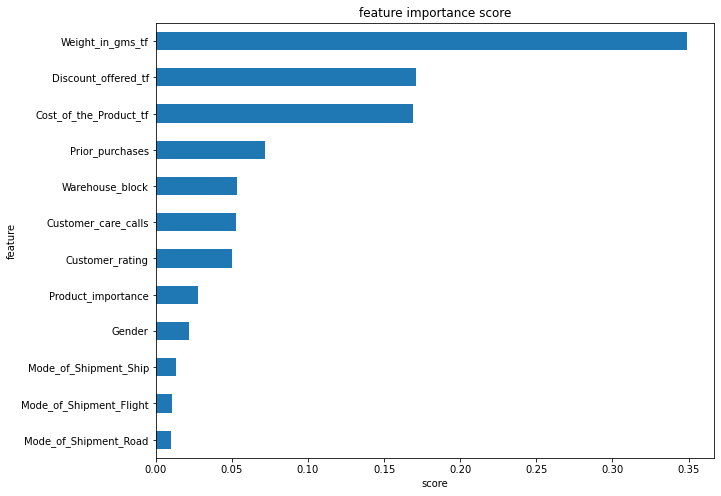

In [97]:
show_feature_importance(model)

Melihat dari feature-feature yang penting diatas dapat ditarik kesimpulan bahwa, untuk mencapai target delivery on time customer dengan tingkat purcase yang tinggi umumnya menggunakan jasa pengiriman dengan metode ship atau kapal dimana tingkat delivery latenya lebih tingga karena berbagai faktor yang menyebabkan. Sehingga untuk kedepannya kategori delivery tertentu dapat disesuikan dengan metode shipment yang lebih cepat sehingga dapat meningkatkan delivery on time. Dari sini dapat ditarik kesimpulan bahwa feature prior purcase dan mode of shippment merupakan feature yang paling berpengaruh pada delivery on time.

> Feature Selection

In [103]:
features = ['Warehouse_block', 'Customer_care_calls', 'Customer_rating', 'Prior_purchases',	'Product_importance','Gender', 'Cost_of_the_Product_tf',	'Discount_offered_tf',	'Weight_in_gms_tf',	'Mode_of_Shipment_Flight',	'Mode_of_Shipment_Road',	'Mode_of_Shipment_Ship']

In [104]:
X_train_selection = X_train[features]
X_test_selection = X_test[features]

> hyperparameter

In [105]:
model = RandomForestClassifier(bootstrap = False, max_depth = 70, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 600, random_state = 42)
model.fit(X_train_selection, y_train )
ypred = model.predict(X_test_selection)
print(f'Recall Score = {recall_score(y_test, ypred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, ypred)}')

Recall Score = 0.6674329501915709
ROC_AUC Score = 0.6582974806823777


> new hyperparameter

In [106]:
print(f'Random Forest:')
RSCV = RandomizedSearchCV(RandomForestClassifier(random_state = 42), params[3], cv = 3, n_jobs = -1, verbose = 0, scoring = ['recall', 'roc_auc'], random_state = 42, refit = 'recall', n_iter = 10)
RSCV.fit(X_train_selection, y_train)
y_pred = RSCV.predict(X_test_selection)
print(f'Recall Score = {recall_score(y_test, y_pred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')


Random Forest:
Recall Score = 0.6674329501915709
ROC_AUC Score = 0.6582974806823777


In [107]:
RSCV.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': False}

Feature selection menurunkan score model karena feature yang ada sebelumnya sudah sedikit namun feature selection membuatnya menjadi lebih sedikit lagi. Feature-feature yang masih mempunyai pengaruh walaupun tidak banyak menjadi hilang, karena itulah score model menjadi menurun

In [119]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


## Soal 3 

> Git 

Dari semua project yang telah dilakukan dari stage 1 hingga stage 3, upload project

https://github.com/haolia/E-Commerce-Shipping-Data